In [1]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle

import seaborn as sns; sns.set(style="ticks", color_codes=True) #matplotlib에 기반한 시각화

#Graph
import plotly 
plotly.tools.set_credentials_file(username='Sherryjeon', api_key='3fCTh7mmnI03FNIYxsFO')
from plotly.graph_objs import *

import plotly.plotly as py
import plotly.graph_objs as go

from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale


from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [21]:
pd.set_option('display.max_columns', 150)

In [2]:
#import train set
loan = pickle.load( open( "pickle/loan2", "rb" ) ) # this set includes y as well


In [3]:
loan.drop('index', axis=1, inplace = True)
loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_length,annual_inc,dti,...,pur_home_improvement,pur_house,pur_major_purchase,pur_medical,pur_moving,pur_other,pur_renewable_energy,pur_small_business,pur_vacation,pur_wedding
0,503151,2100.0,2100.0,2100.000000,6.39,64.27,0.960385,1,40000.0,1.53,...,0,0,0,0,0,0,0,1,0,0
1,6814862,3000.0,3000.0,3000.000000,12.35,100.15,0.828769,4,75000.0,17.70,...,0,0,0,0,0,1,0,0,0,0
2,3219064,12000.0,12000.0,12000.000000,11.14,393.67,0.862483,5,60000.0,18.94,...,0,0,0,0,0,0,0,0,0,0
3,4424694,21725.0,21725.0,21725.000000,11.14,712.69,0.862483,6,72000.0,23.04,...,0,0,0,0,0,0,0,0,0,0
4,3414601,15250.0,15250.0,15250.000000,13.11,514.65,0.828769,5,55000.0,15.86,...,0,0,0,0,0,0,0,0,0,0
5,46764111,35000.0,35000.0,35000.000000,19.52,917.97,0.600426,10,127800.0,25.13,...,0,0,0,0,0,0,0,0,0,0
6,2306454,25000.0,25000.0,25000.000000,19.05,917.04,0.649399,3,125000.0,22.38,...,0,0,0,0,0,0,0,0,0,0
7,23876062,35000.0,35000.0,35000.000000,24.08,1008.51,0.560944,10,114000.0,28.15,...,0,0,0,0,0,0,0,0,0,0
8,11995544,14000.0,14000.0,13975.000000,11.99,464.94,0.848689,8,39000.0,19.75,...,0,0,0,0,0,0,0,0,0,0
9,1626888,10800.0,10800.0,10800.000000,15.31,376.03,0.778796,10,37000.0,22.92,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print (loan.shape)

(203165, 141)


In [5]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       ...
       'pur_home_improvement', 'pur_house', 'pur_major_purchase',
       'pur_medical', 'pur_moving', 'pur_other', 'pur_renewable_energy',
       'pur_small_business', 'pur_vacation', 'pur_wedding'],
      dtype='object', length=141)

# 1. EDA for real features


In [6]:
# deduct mass features (almost values are zero)

real = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'annual_inc', 'issue_d',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc','total_rev_hi_lim'
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util' 
       ]

## 1_1) Checking the Correlation

In [7]:
cor = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'annual_inc', 
        'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal','total_rev_hi_lim']

In [8]:
print (len(cor))
#number of elements for cor is 28

24


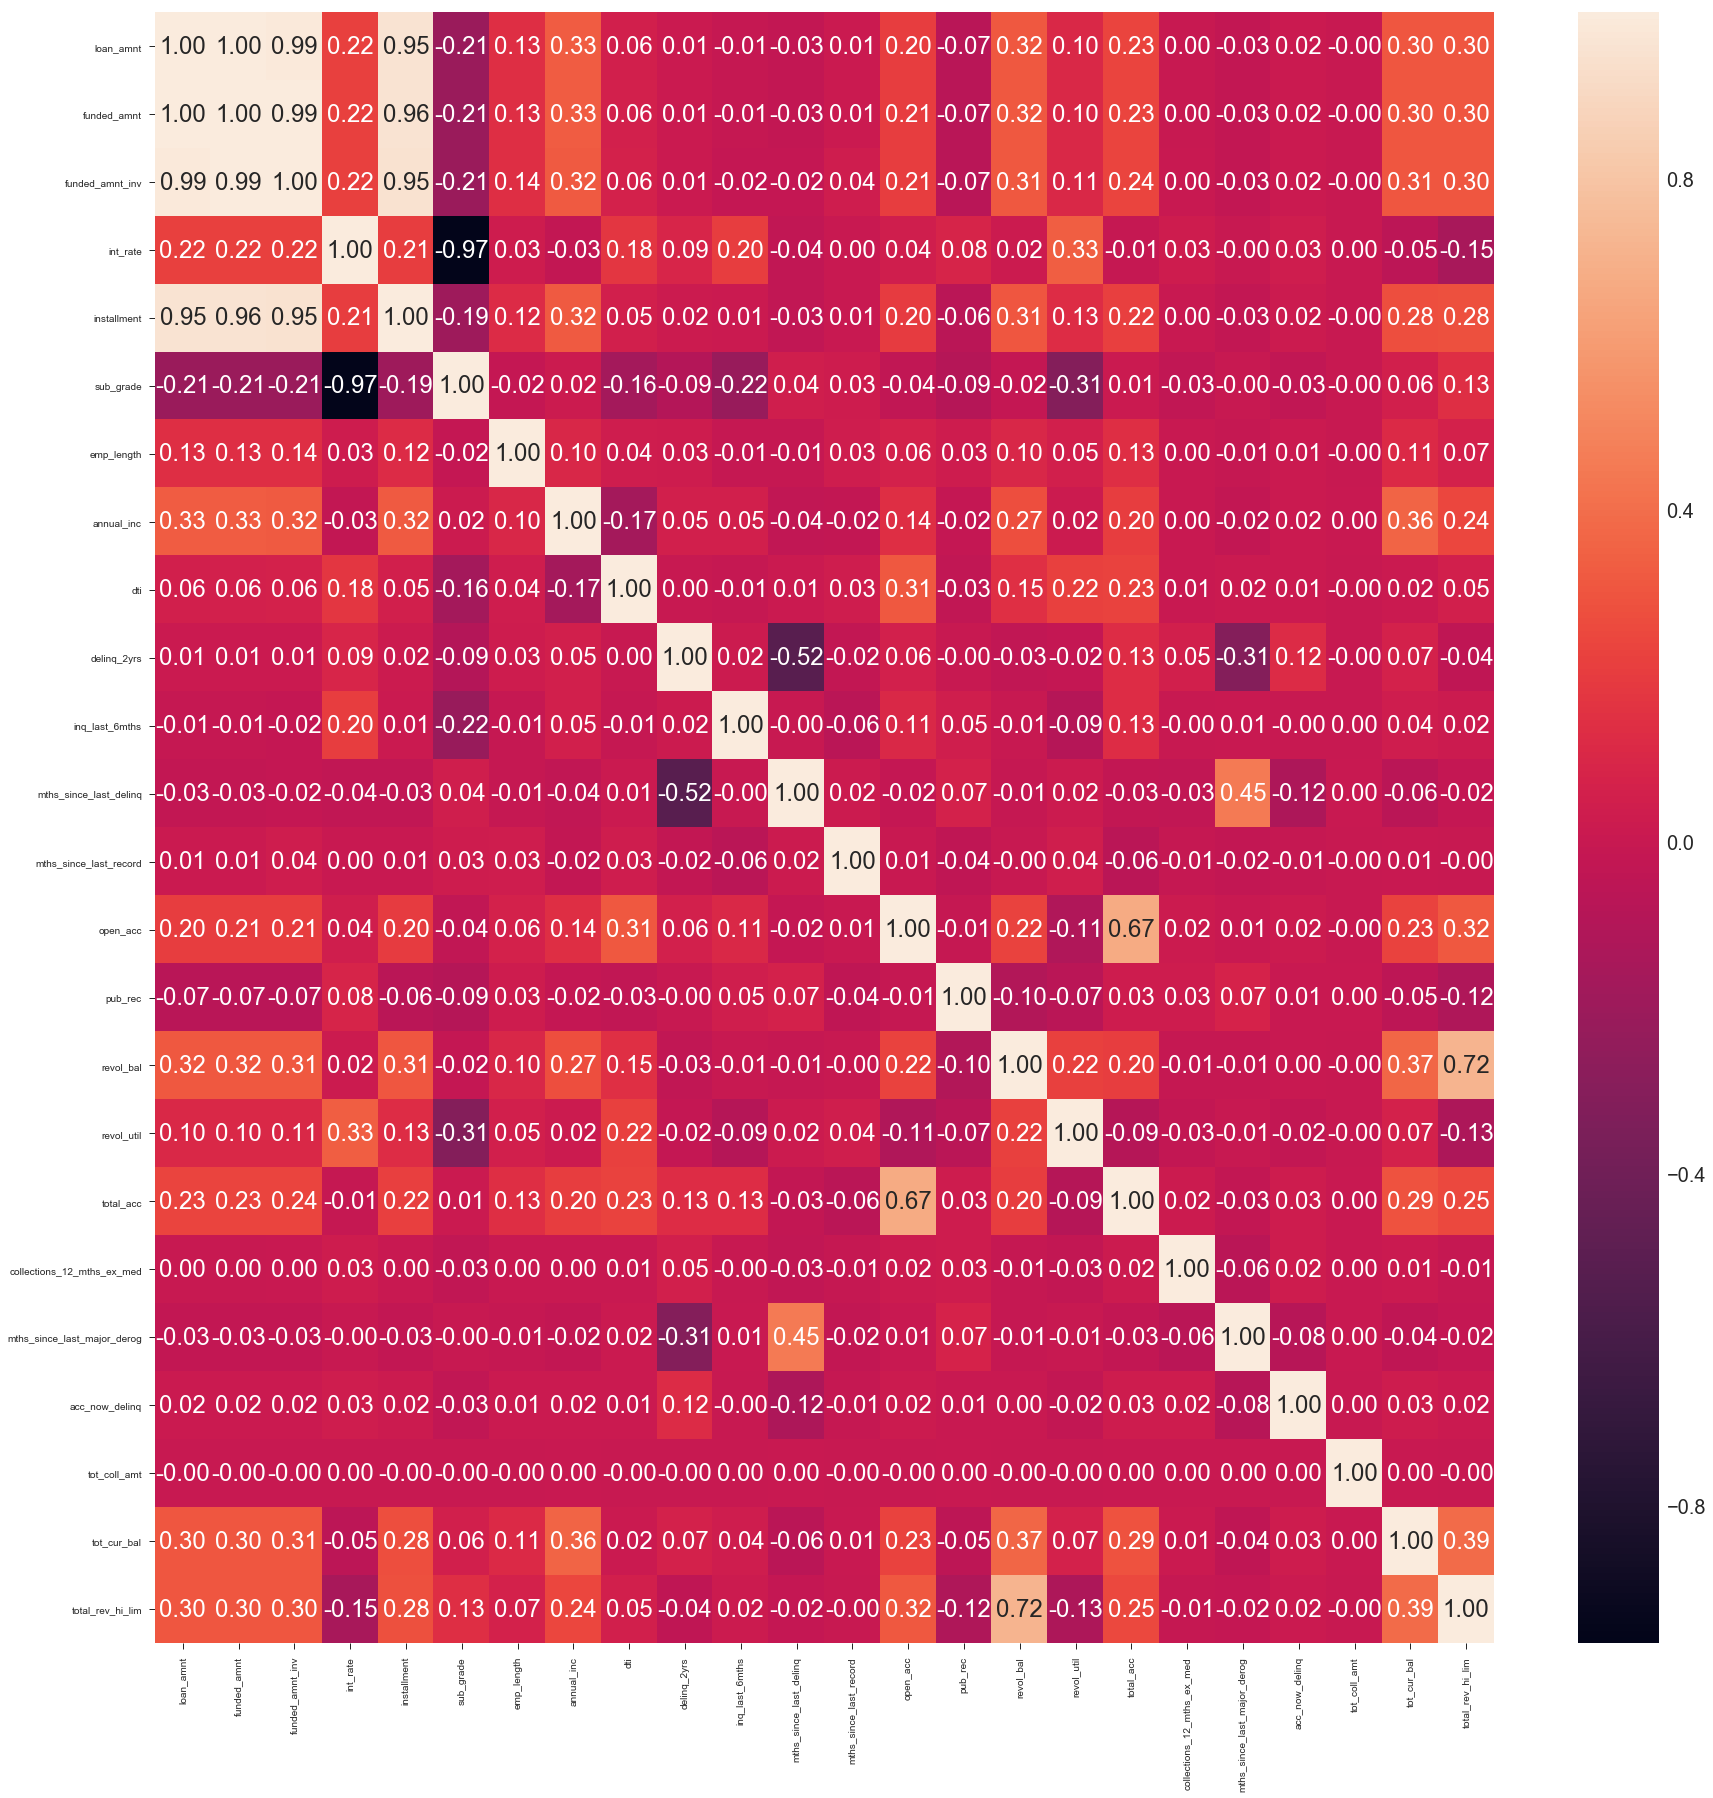

In [9]:
corrmat = loan[cor].corr()

f, ax = plt.subplots(figsize=(30,30))
sns.set(font_scale=2)
hm = sns.heatmap(corrmat, cbar=True, annot=True, fmt='.2f',
                )

plt.show()

#### There are some features have strong correlation

* loan_amnt - funded_amnt :1.0
* loan_amnt - funded_amnt_inv : 0.99
* loan_amnt - installment : 0.95
<br><br>
* funded_amnt - funded_amnt_inv : 0.99
* funded_amnt - installment : 0.95
<br><br>
* funded_amnt_inv - installment : 0.95
<br><br><br>
* open_acc - total_acc : 0.67
* revol_bal - total_rev_hi_lim : 0.72
<br><br>
* mths_since_last_delinq - mths_since_last_major_derog : 0.45

### (1) amount

In [10]:
amount = ['loan_amnt', 'funded_amnt',  'funded_amnt_inv', 'installment','loan_status' ]
corrmat = loan[amount].corr()



trace = go.Heatmap(z=np.array(corrmat),
                   x=['loan_amnt', 'funded_amnt',  'funded_amnt_inv', 'installment','loan_status'],
                   y=['loan_amnt', 'funded_amnt',  'funded_amnt_inv', 'installment','loan_status'])
data=[trace]
plotly.offline.plot(data, filename='labelled-heatmap')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `labelled-heatmap` didn't end with .html. Adding .html to the end of your file.



'file:///Users/SherryJeon/GoogleDriver/FastCampus/Project/personal/labelled-heatmap.html'

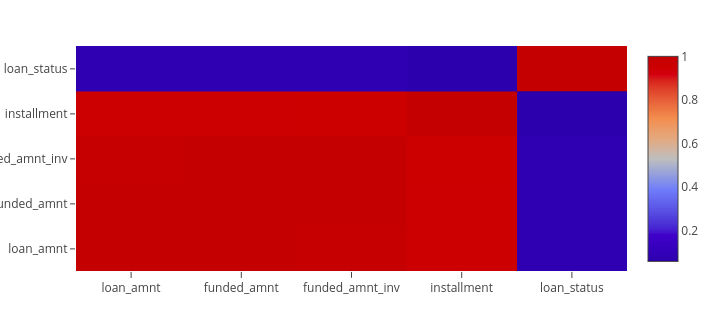

* Correlation coefficient with 'loan_status', funded_amnt is the highest.(0.076) Therefor, leave only 'funded_amnt' and drop rest of features, before that, I would check any relationship between funded_amnt and loan_amnt.

In [11]:
loan_check = loan[['loan_amnt', 'funded_amnt', 'loan_status']]
loan_check['deduct_pro'] = loan_check.funded_amnt / loan_check.loan_amnt
loan_check

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,loan_amnt,funded_amnt,loan_status,deduct_pro
0,2100.0,2100.0,0,1.000000
1,3000.0,3000.0,0,1.000000
2,12000.0,12000.0,0,1.000000
3,21725.0,21725.0,0,1.000000
4,15250.0,15250.0,1,1.000000
5,35000.0,35000.0,0,1.000000
6,25000.0,25000.0,1,1.000000
7,35000.0,35000.0,1,1.000000
8,14000.0,14000.0,1,1.000000
9,10800.0,10800.0,0,1.000000


In [12]:
loan_check.deduct_pro.value_counts()

1.000000    201737
0.625000        15
0.700000        10
0.637500        10
0.633333         9
0.610000         9
0.650000         8
0.635000         8
0.750000         8
0.675000         7
0.740000         7
0.680000         7
0.600000         7
0.642857         6
0.608333         6
0.640000         6
0.800000         6
0.631250         6
0.875000         5
0.630000         5
0.606250         5
0.629000         5
0.612500         5
0.687500         5
0.500000         5
0.620000         5
0.775000         4
0.652000         4
0.628000         4
0.583333         4
             ...  
0.643594         1
0.416667         1
0.970833         1
0.676429         1
0.476190         1
0.667857         1
0.499230         1
0.771667         1
0.734000         1
0.480469         1
0.712766         1
0.953704         1
0.623000         1
0.675714         1
0.992391         1
0.791489         1
0.912500         1
0.690625         1
0.979412         1
0.893333         1
0.110714         1
0.839583    

In [13]:

corrmat = loan_check[['funded_amnt','deduct_pro', 'loan_status']].corr()



trace = go.Heatmap(z=np.array(corrmat),
                   x=['funded_amnt','deduct_pro', 'loan_status'],
                   y=['funded_amnt','deduct_pro', 'loan_status'])
data=[trace]
plotly.offline.plot(data, filename='Annotated Heatmap')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `Annotated Heatmap` didn't end with .html. Adding .html to the end of your file.



'file:///Users/SherryJeon/GoogleDriver/FastCampus/Project/personal/Annotated Heatmap.html'

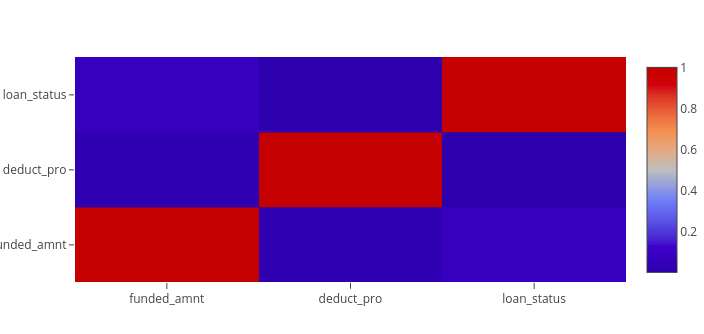

* It looks not any relationship between 'deduct_pro' and 'loan_status'

In [14]:
drop_list = ['loan_amnt',  'funded_amnt_inv', 'installment']


In [15]:
loan = loan.drop(drop_list, axis=1)

### (2) Rest of featrues

In [16]:

    
rest = ['open_acc','total_acc','revol_bal','total_rev_hi_lim','mths_since_last_delinq','mths_since_last_major_derog' ,'loan_status']  

corrmat = loan[rest].corr()



trace = go.Heatmap(z=np.array(corrmat),
                   x=rest,
                   y=rest)
data=[trace]
plotly.offline.plot(data, filename='labelled-heatmap')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `labelled-heatmap` didn't end with .html. Adding .html to the end of your file.



'file:///Users/SherryJeon/GoogleDriver/FastCampus/Project/personal/labelled-heatmap.html'

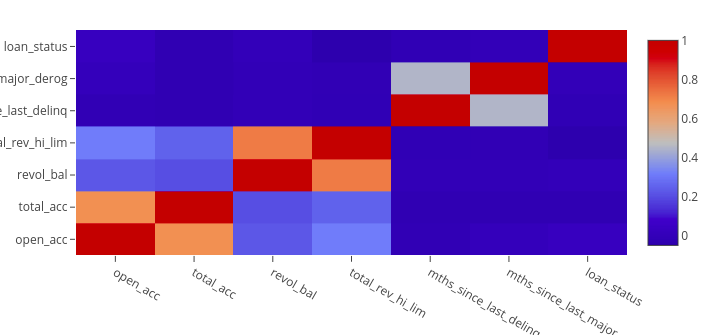

##### Select features having higher correlation
* total_acc > open_acc
* revol_bal < total_rev_hi_lim
* mths_since_last_delinq > mths_since_last_major_derog


In [17]:
drop_list = ['open_acc','revol_bal' ,'mths_since_last_major_derog']
loan = loan.drop(drop_list, axis = 1)

In [18]:
print (loan.shape)

(203165, 135)


In [22]:
loan.head()

,id,funded_amnt,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,term,veri_Not Verified,veri_Source Verified,veri_Verified,plan_n,plan_y,addr_AK,addr_AL,addr_AR,addr_AZ,addr_CA,addr_CO,addr_CT,addr_DC,addr_DE,addr_FL,addr_GA,addr_HI,addr_IA,addr_ID,addr_IL,addr_IN,addr_KS,addr_KY,addr_LA,addr_MA,addr_MD,addr_ME,addr_MI,addr_MN,addr_MO,addr_MS,addr_MT,addr_NC,addr_ND,addr_NE,addr_NH,addr_NJ,addr_NM,addr_NV,addr_NY,addr_OH,addr_OK,addr_OR,addr_PA,addr_RI,addr_SC,addr_SD,addr_TN,addr_TX,addr_UT,addr_VA,addr_VT,addr_WA,addr_WI,addr_WV,addr_WY,initial_f,initial_w,credit_period,issue_Apr,issue_Aug,issue_Dec,issue_Feb,issue_Jan,issue_Jul,issue_Jun,issue_Mar,issue_May,issue_Nov,issue_Oct,issue_Sep,pur_car,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_house,pur_major_purchase,pur_medical,pur_moving,pur_other,pur_renewable_energy,pur_small_business,pur_vacation,pur_wedding
0,503151,2100.0,6.39,0.960385,1,40000.0,1.53,0.0,0.0,34.887939,74.31392,0.0,8.1,16.0,0.0,0.0,0.0,79066.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29543.592078,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.287961,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6814862,3000.0,12.35,0.828769,4,75000.0,17.70,0.0,0.0,34.887939,74.31392,0.0,10.5,23.0,0.0,0.0,103.0,56047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26700.000000,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.194649,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,156,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3219064,12000.0,11.14,0.862483,5,60000.0,18.94,0.0,0.0,34.887939,74.31392,0.0,43.9,18.0,0.0,0.0,0.0,169486.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15000.000000,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.526023,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,155,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4424694,21725.0,11.14,0.862483,6,72000.0,23.04,0.0,1.0,34.887939,74.31392,0.0,41.0,17.0,0.0,0.0,3910.0,205444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33000.000000,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.834747,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,278,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3414601,15250.0,13.11,0.828769,5,55000.0,15.86,0.0,0.0,70.000000,74.31392,0.0,70.9,22.0,0.0,0.0,0.0,281777.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24100.000000,0.0,0.0,0.0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.526023,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,158,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## * Export non-PCA Dataset

In [24]:

pickle.dump(loan, open( "pickle/X_train_non-pca", "wb" ) )


# 2. PCA
* To prevent overfiting, feasture having zero over 80% and dummies, will be reduced by PCA


## 2-1) PCA_Modelling

In [200]:
loan.shape

(203165, 135)

In [201]:


pd.set_option('display.max_columns', 150)

In [207]:
loan.revol_util.value_counts()

0.00      1601
61.00      363
63.00      363
62.00      353
56.00      348
67.00      345
58.00      344
53.00      342
57.00      336
54.00      335
51.00      335
52.00      333
59.00      332
46.00      328
60.00      326
76.00      324
65.00      323
68.70      323
47.00      322
66.00      321
55.00      320
53.50      320
50.00      320
61.30      319
61.60      318
71.00      316
55.70      313
60.40      313
59.60      312
70.00      310
          ... 
57.56        1
105.50       1
5.34         1
9.34         1
36.78        1
41.85        1
56.26        1
122.50       1
104.60       1
117.60       1
148.00       1
113.10       1
106.90       1
18.82        1
107.90       1
111.40       1
94.46        1
132.10       1
126.30       1
109.40       1
13.56        1
116.40       1
58.77        1
112.90       1
27.81        1
7.64         1
113.40       1
33.14        1
108.20       1
112.20       1
Name: revol_util, Length: 1182, dtype: int64

In [203]:
loan.head()

,id,funded_amnt,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,term,veri_Not Verified,veri_Source Verified,veri_Verified,plan_n,plan_y,addr_AK,addr_AL,addr_AR,addr_AZ,addr_CA,addr_CO,addr_CT,addr_DC,addr_DE,addr_FL,addr_GA,addr_HI,addr_IA,addr_ID,addr_IL,addr_IN,addr_KS,addr_KY,addr_LA,addr_MA,addr_MD,addr_ME,addr_MI,addr_MN,addr_MO,addr_MS,addr_MT,addr_NC,addr_ND,addr_NE,addr_NH,addr_NJ,addr_NM,addr_NV,addr_NY,addr_OH,addr_OK,addr_OR,addr_PA,addr_RI,addr_SC,addr_SD,addr_TN,addr_TX,addr_UT,addr_VA,addr_VT,addr_WA,addr_WI,addr_WV,addr_WY,initial_f,initial_w,credit_period,issue_Apr,issue_Aug,issue_Dec,issue_Feb,issue_Jan,issue_Jul,issue_Jun,issue_Mar,issue_May,issue_Nov,issue_Oct,issue_Sep,pur_car,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_house,pur_major_purchase,pur_medical,pur_moving,pur_other,pur_renewable_energy,pur_small_business,pur_vacation,pur_wedding
0,503151,2100.0,6.39,0.960385,1,40000.0,1.53,0.0,0.0,34.887939,74.31392,0.0,8.1,16.0,0.0,0.0,0.0,79066.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29543.592078,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.287961,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,141,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6814862,3000.0,12.35,0.828769,4,75000.0,17.70,0.0,0.0,34.887939,74.31392,0.0,10.5,23.0,0.0,0.0,103.0,56047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26700.000000,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.194649,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,156,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3219064,12000.0,11.14,0.862483,5,60000.0,18.94,0.0,0.0,34.887939,74.31392,0.0,43.9,18.0,0.0,0.0,0.0,169486.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15000.000000,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.526023,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,155,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4424694,21725.0,11.14,0.862483,6,72000.0,23.04,0.0,1.0,34.887939,74.31392,0.0,41.0,17.0,0.0,0.0,3910.0,205444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33000.000000,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.834747,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,278,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3414601,15250.0,13.11,0.828769,5,55000.0,15.86,0.0,0.0,70.000000,74.31392,0.0,70.9,22.0,0.0,0.0,0.0,281777.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24100.000000,0.0,0.0,0.0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.526023,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,158,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [209]:
temp_features=['delinq_2yrs', 'pub_rec','collections_12_mths_ex_med','acc_now_delinq',
                'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il',
                'total_bal_il','il_util','open_rv_12m','open_rv_24m','open_rv_24m',
                'max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m',
                'term_ 36 months','term_ 60 months','grade_A','grade_B','grade_C','grade_D',
                'grade_E','grade_F','grade_G','home_ANY','home_MORTGAGE','home_NONE','home_OTHER',
                'home_OWN','home_RENT','veri_Not Verified','veri_Source Verified','veri_Verified','plan_n',
                'plan_y','addr_AK','addr_AL','addr_AR','addr_AZ','addr_CA','addr_CO','addr_CT','addr_DC',
                'addr_DE','addr_FL','addr_GA','addr_HI','addr_IA','addr_ID','addr_IL','addr_IN','addr_KS',
                'addr_KY','addr_LA','addr_MA','addr_MD','addr_ME','addr_MI','addr_MN','addr_MO',
                'addr_MS','addr_MT','addr_NC','addr_ND','addr_NE','addr_NH','addr_NJ','addr_NM','addr_NV',
                'addr_NY','addr_OH','addr_OK','addr_OR','addr_PA','addr_RI','addr_SC','addr_SD','addr_TN',
                'addr_TX','addr_UT','addr_VA','addr_VT','addr_WA','addr_WI','addr_WV','addr_WY','initial_f',
                'initial_w','credit_period','issue_Apr','issue_Aug','issue_Dec','issue_Feb','issue_Jan',
                'issue_Jul','issue_Jun','issue_Mar','issue_May','issue_Nov','issue_Oct','issue_Sep',
                'pur_car','pur_credit_card','pur_debt_consolidation','pur_educational','pur_home_improvement',
                'pur_house','pur_major_purchase','pur_medical','pur_moving','pur_other','pur_renewable_energy',
                'pur_small_business','pur_vacation','pur_wedding']

In [210]:
loan_temp = loan[temp_features]
loan_temp.tail()


,delinq_2yrs,pub_rec,collections_12_mths_ex_med,acc_now_delinq,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,veri_Not Verified,veri_Source Verified,veri_Verified,plan_n,plan_y,addr_AK,addr_AL,addr_AR,addr_AZ,addr_CA,addr_CO,addr_CT,addr_DC,addr_DE,addr_FL,addr_GA,addr_HI,addr_IA,addr_ID,addr_IL,addr_IN,addr_KS,addr_KY,addr_LA,addr_MA,addr_MD,addr_ME,addr_MI,addr_MN,addr_MO,addr_MS,addr_MT,addr_NC,addr_ND,addr_NE,addr_NH,addr_NJ,addr_NM,addr_NV,addr_NY,addr_OH,addr_OK,addr_OR,addr_PA,addr_RI,addr_SC,addr_SD,addr_TN,addr_TX,addr_UT,addr_VA,addr_VT,addr_WA,addr_WI,addr_WV,addr_WY,initial_f,initial_w,credit_period,issue_Apr,issue_Aug,issue_Dec,issue_Feb,issue_Jan,issue_Jul,issue_Jun,issue_Mar,issue_May,issue_Nov,issue_Oct,issue_Sep,pur_car,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_house,pur_major_purchase,pur_medical,pur_moving,pur_other,pur_renewable_energy,pur_small_business,pur_vacation,pur_wedding
203160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,82,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
203161,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,114,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
203162,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,379,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
203163,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,197,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
203164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,281,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [213]:
print(loan_temp.shape)

(203165, 119)


## 2-2) PCA Evaluation

In [211]:
# Scaling
scaler = StandardScaler()
scaler.fit(loan_temp)
X_scaled = scaler.transform(loan_temp)


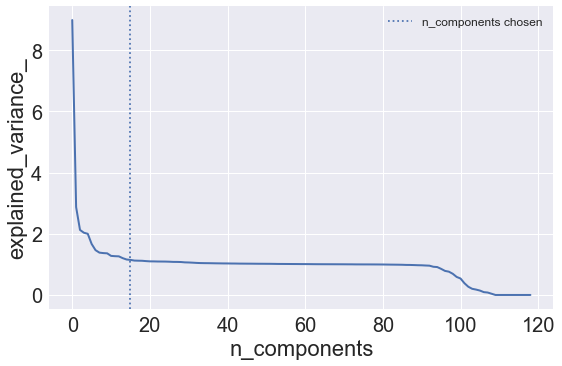

In [214]:
logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = X_scaled
y_digits = loan['loan_status']
# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(10, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [1, 5, 10, 15, 20, 25, 50, 70]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()




* It looks 15 features from PCA is the best

## 2-3) Visualize

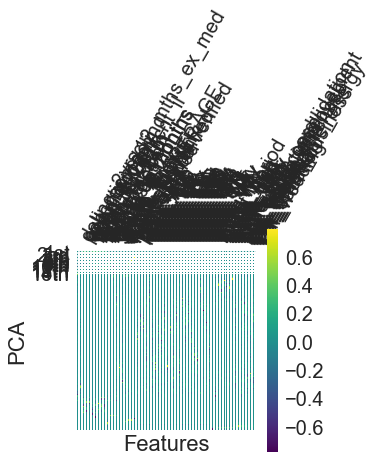

In [215]:
#fig = plt.figure(figsize=(20,10))

plt.matshow(pca.components_, cmap='viridis')

plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,],\
           ['1st', '2nd', '3rd', '4th', '5th','6th','7th','8th','9th','10th','11th','12th','13th','14th','15th'])
plt.colorbar()
plt.xticks(range(len(loan_temp.columns)), loan_temp.columns, rotation=60, ha='left' )

plt.xlabel("Features")
plt.ylabel('PCA')

plt.show()




## 2-3) Applying PCA features

In [216]:

pca = decomposition.PCA()
pca = PCA(n_components = 15) # Making PCA Model
pca.fit(X_scaled)
PCA_feature = pca.transform(X_scaled)

In [217]:
PCA_feature = pd.DataFrame(PCA_feature)
PCA_feature.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
203160,-0.108152,-2.321080,1.625421,0.416447,-0.112889,1.201466,-0.553429,0.387713,1.840053,0.020198,-0.086673,-0.569295,-0.253808,0.245477,0.163249
203161,-0.047457,-0.111440,0.727868,2.104203,-0.101998,1.235114,-2.347026,0.573418,0.589003,0.237238,0.422350,0.563662,0.416826,-0.732537,0.295995
203162,-0.039947,0.288380,0.278697,2.151440,0.049875,-1.228092,-2.555916,0.465789,-0.555616,0.656811,0.908424,0.739844,-2.036593,-0.077663,0.553528
203163,0.030878,0.118259,-0.217737,-1.361837,-0.012774,1.930595,-1.399760,-0.284116,-1.084510,1.081809,-0.489117,0.133602,-1.498123,0.430946,-0.687175
203164,-0.080545,-1.793540,0.480912,0.165761,0.107204,-1.079641,-0.711351,0.074570,-1.479284,0.605177,-2.144853,-1.105453,0.500119,-1.903126,1.593914


In [218]:
loan = loan.drop(temp_features, axis = 1)
loan

,id,funded_amnt,int_rate,sub_grade,emp_length,annual_inc,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_util,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,term
0,503151,2100.0,6.39,0.960385,1,40000.0,1.53,0.0,34.887939,74.31392,8.1,16.0,0.0,79066.0,29543.592078,0,0.287961
1,6814862,3000.0,12.35,0.828769,4,75000.0,17.70,0.0,34.887939,74.31392,10.5,23.0,103.0,56047.0,26700.000000,0,1.194649
2,3219064,12000.0,11.14,0.862483,5,60000.0,18.94,0.0,34.887939,74.31392,43.9,18.0,0.0,169486.0,15000.000000,0,1.526023
3,4424694,21725.0,11.14,0.862483,6,72000.0,23.04,1.0,34.887939,74.31392,41.0,17.0,3910.0,205444.0,33000.000000,0,1.834747
4,3414601,15250.0,13.11,0.828769,5,55000.0,15.86,0.0,70.000000,74.31392,70.9,22.0,0.0,281777.0,24100.000000,1,1.526023
5,46764111,35000.0,19.52,0.600426,10,127800.0,25.13,0.0,34.887939,74.31392,75.0,32.0,0.0,569492.0,87350.000000,0,3.418477
6,2306454,25000.0,19.05,0.649399,3,125000.0,22.38,1.0,28.000000,74.31392,86.1,24.0,108.0,64649.0,33500.000000,1,0.909421
7,23876062,35000.0,24.08,0.560944,10,114000.0,28.15,2.0,31.000000,74.31392,90.2,47.0,0.0,284638.0,45000.000000,1,3.418477
8,11995544,14000.0,11.99,0.848689,8,39000.0,19.75,0.0,34.887939,101.00000,58.0,21.0,0.0,118782.0,24100.000000,1,2.542470
9,1626888,10800.0,15.31,0.778796,10,37000.0,22.92,1.0,43.000000,74.31392,29.3,19.0,2191.0,10899.0,18600.000000,0,3.418477


In [219]:
loan_pca = pd.concat([loan, PCA_feature], axis = 1)

In [221]:
loan_pca.head()

,id,funded_amnt,int_rate,sub_grade,emp_length,annual_inc,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_util,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,term,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,503151,2100.0,6.39,0.960385,1,40000.0,1.53,0.0,34.887939,74.31392,8.1,16.0,0.0,79066.0,29543.592078,0,0.287961,-0.111677,-2.445925,1.155702,-0.463443,0.228939,-1.565314,-0.304189,-1.672557,0.177304,-0.187059,-1.010468,1.570261,-2.245821,0.625745,-0.995649
1,6814862,3000.0,12.35,0.828769,4,75000.0,17.70,0.0,34.887939,74.31392,10.5,23.0,103.0,56047.0,26700.000000,0,1.194649,-0.106282,-1.687168,-1.426440,-1.460103,0.099699,-0.905149,0.376851,-0.500351,1.060276,0.602844,0.608812,-1.376765,3.360193,-0.989492,-0.214418
2,3219064,12000.0,11.14,0.862483,5,60000.0,18.94,0.0,34.887939,74.31392,43.9,18.0,0.0,169486.0,15000.000000,0,1.526023,-0.098240,-1.398659,-1.345921,-0.977164,-0.025183,1.608529,0.437096,0.314022,1.258504,-1.059943,0.048812,-1.183176,0.936968,0.687569,0.697422
3,4424694,21725.0,11.14,0.862483,6,72000.0,23.04,1.0,34.887939,74.31392,41.0,17.0,3910.0,205444.0,33000.000000,0,1.834747,-0.096107,-0.186407,-0.663118,-1.275015,-0.024681,1.462958,-1.143431,1.255401,0.537564,-0.004304,0.035123,-0.032972,0.929011,0.073289,-0.874387
4,3414601,15250.0,13.11,0.828769,5,55000.0,15.86,0.0,70.000000,74.31392,70.9,22.0,0.0,281777.0,24100.000000,1,1.526023,-0.043338,0.078835,-2.365768,1.056343,0.142126,-0.932199,-2.172063,1.150095,0.485828,-0.360496,0.305563,0.281699,0.077764,0.088923,-0.121617


In [223]:
loan_pca.shape


(203165, 31)

# 3. Clear  not necessary features 

In [222]:
loan_pca.drop('id', axis = 1, inplace = True)

In [224]:
y_train = loan_pca['loan_status']


In [225]:
loan_pca.drop('loan_status', axis = 1, inplace = True)

# 4. Pickle

In [231]:

pickle.dump(loan_pca, open( "pickle/loan3", "wb" ) )
pickle.dump(y_train, open( "pickle/loan_y3", "wb" ) )